In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data
df = pd.read_csv('1.BeijingHouse.csv')
df.head(3)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway
0,https://bj.lianjia.com/chengjiao/101084782030....,1.010000e+11,116.475489,40.019520,1.110000e+12,2016-08-09,1464,106,415.0,31680,...,1,1,1.0,2005,3,6,0.217,1,0,1
1,https://bj.lianjia.com/chengjiao/101086012217....,1.010000e+11,116.453917,39.881534,1.110000e+12,2016-07-28,903,126,575.0,43436,...,1,2,1.0,2004,4,6,0.667,1,1,0
2,https://bj.lianjia.com/chengjiao/101086041636....,1.010000e+11,116.561978,39.877145,1.110000e+12,2016-12-11,1271,48,1030.0,52021,...,1,3,4.0,2005,3,6,0.500,1,0,0


In [3]:
df.shape

(10629, 23)

In [4]:
df.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway'],
      dtype='object')

In [5]:
df.isnull().sum()

url                      0
id                       0
Lng                      0
Lat                      0
Cid                      0
tradeTime                0
DOM                      0
followers                0
totalPrice               0
price                    0
square                   0
livingRoom               0
drawingRoom              0
kitchen                  0
bathRoom                 0
buildingType           112
constructionTime         0
renovationCondition      0
buildingStructure        0
ladderRatio              0
elevator                 0
fiveYearsProperty        0
subway                   0
dtype: int64

In [6]:
df['constructionTime'] = df[df['constructionTime']!='????']['constructionTime'].astype('int64')

In [7]:
df = df[['Lng', 'Lat', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway']]

In [8]:
#df = pd.get_dummies(df)

In [9]:
df['price_log'] = np.log(df['price'])
df['square_log'] = np.log(df['square'])

In [10]:
df['Lng_diff_quad'] = (df['Lng']-116.4066)**2
df['Lat_diff_quad'] = (df['Lat']-39.8822)**2

In [11]:
df['livingRoom^2'] = df['livingRoom']**2
df['drawingRoom^2'] = df['drawingRoom']**2
df['bathRoom^2'] = df['bathRoom']**2
df['kitchen^2'] = df['kitchen']**2

In [12]:
#df['livingRoom^2+'] = df['livingRoom']+df['livingRoom^2']
#df['drawingRoom^2+'] = df['drawingRoom']+df['drawingRoom^2']
#df['bathRoom^2+'] = df['bathRoom']+df['bathRoom^2']
#df['kitchen^2+'] = df['kitchen']+df['kitchen^2']

In [13]:
df['buildingType1'] = df['buildingType'].map(lambda x: 1 if x in [1.0] else 0)
df['buildingType2'] = df['buildingType'].map(lambda x: 1 if x in [2.0] else 0)
df['buildingType3'] = df['buildingType'].map(lambda x: 1 if x in [3.0] else 0)
df['buildingType4'] = df['buildingType'].map(lambda x: 1 if x in [4.0] else 0)
#df.drop(columns = 'buildingType', inplace = True)

In [14]:
df['renovationCondition1'] = df['renovationCondition'].map(lambda x: 1 if x in [1] else 0)
df['renovationCondition2'] = df['renovationCondition'].map(lambda x: 1 if x in [2] else 0)
df['renovationCondition3'] = df['renovationCondition'].map(lambda x: 1 if x in [3] else 0)
df['renovationCondition4'] = df['renovationCondition'].map(lambda x: 1 if x in [4] else 0)
#df.drop(columns = 'renovationCondition', inplace = True)

In [15]:
df['buildingStructure1'] = df['buildingStructure'].map(lambda x: 1 if x in [1] else 0)
df['buildingStructure2'] = df['buildingStructure'].map(lambda x: 1 if x in [2] else 0)
df['buildingStructure3'] = df['buildingStructure'].map(lambda x: 1 if x in [3] else 0)
df['buildingStructure4'] = df['buildingStructure'].map(lambda x: 1 if x in [4] else 0)
df['buildingStructure5'] = df['buildingStructure'].map(lambda x: 1 if x in [5] else 0)
df['buildingStructure6'] = df['buildingStructure'].map(lambda x: 1 if x in [6] else 0)
#df.drop(columns = 'buildingStructure', inplace = True)

In [16]:
df.columns

Index(['Lng', 'Lat', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'price_log', 'square_log', 'Lng_diff_quad', 'Lat_diff_quad',
       'livingRoom^2', 'drawingRoom^2', 'bathRoom^2', 'kitchen^2',
       'buildingType1', 'buildingType2', 'buildingType3', 'buildingType4',
       'renovationCondition1', 'renovationCondition2', 'renovationCondition3',
       'renovationCondition4', 'buildingStructure1', 'buildingStructure2',
       'buildingStructure3', 'buildingStructure4', 'buildingStructure5',
       'buildingStructure6'],
      dtype='object')

In [17]:
selected_cols = ['price_log', 'square_log',
    'Lng_diff_quad', 'Lat_diff_quad',
    'livingRoom', 'livingRoom^2', 'drawingRoom', 'drawingRoom^2', 
    'bathRoom', 'bathRoom^2', 'kitchen', 'kitchen^2',
    'constructionTime', 'fiveYearsProperty',
    'ladderRatio', 'elevator', 'subway',
    'buildingType1', 'buildingType2', 'buildingType3', 'buildingType4', 
    'renovationCondition1', 'renovationCondition2', 
    'renovationCondition3', 'renovationCondition4', 
    'buildingStructure1', 'buildingStructure2', 'buildingStructure3', 
    'buildingStructure4', 'buildingStructure5', 'buildingStructure6']

In [18]:
selected_df = df[selected_cols]

In [19]:
selected_corr_matrix = selected_df.corr()[selected_cols]

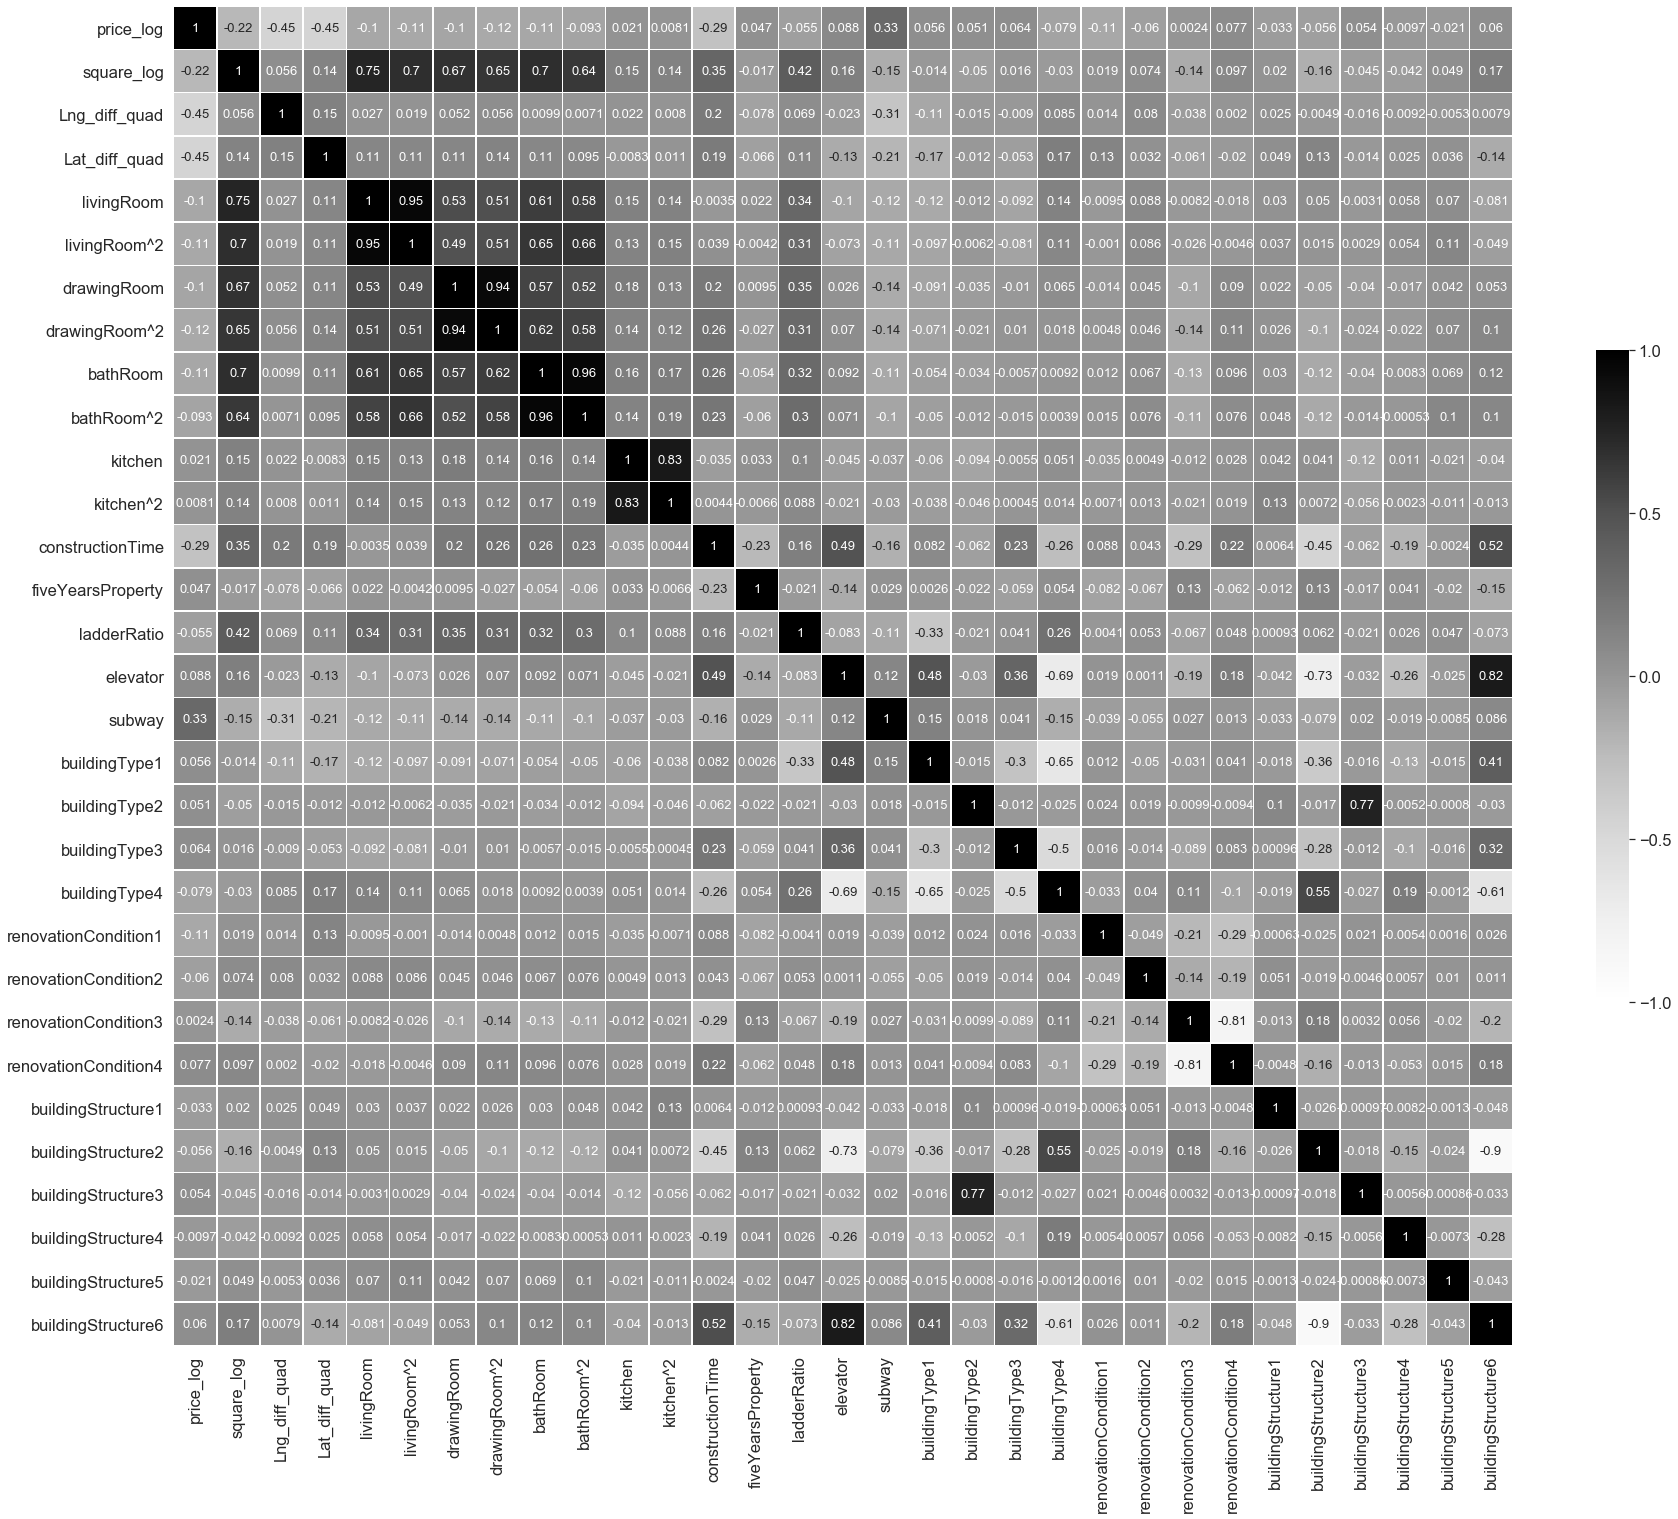

In [22]:
f, ax = plt.subplots(figsize=(30, 30))

heatmap = sns.heatmap(selected_corr_matrix,
                      square = True,
                      linewidths = .5,
                      #cmap = 'coolwarm',
                      cmap = 'Greys',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                                #'ticks' : [0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 13})

#add the column names as labels
ax.set_yticklabels(selected_cols, rotation = 0)
ax.set_xticklabels(selected_cols)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
sns.set(font_scale=1.5)

#f.savefig('selected_corr_matrix_mono.png')